# Histogram vs. Kernel Density Estimation
In this exercise we will get to play with visualizing data as a histogram and also estimating a continuous distribution from a kernel density estimation.

 Adapted from: Jake VanderPlas
 
 License: BSD
 
 For more information, see http://astroML.github.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
#----------------------------------------------------------------------
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=8, usetex=False)

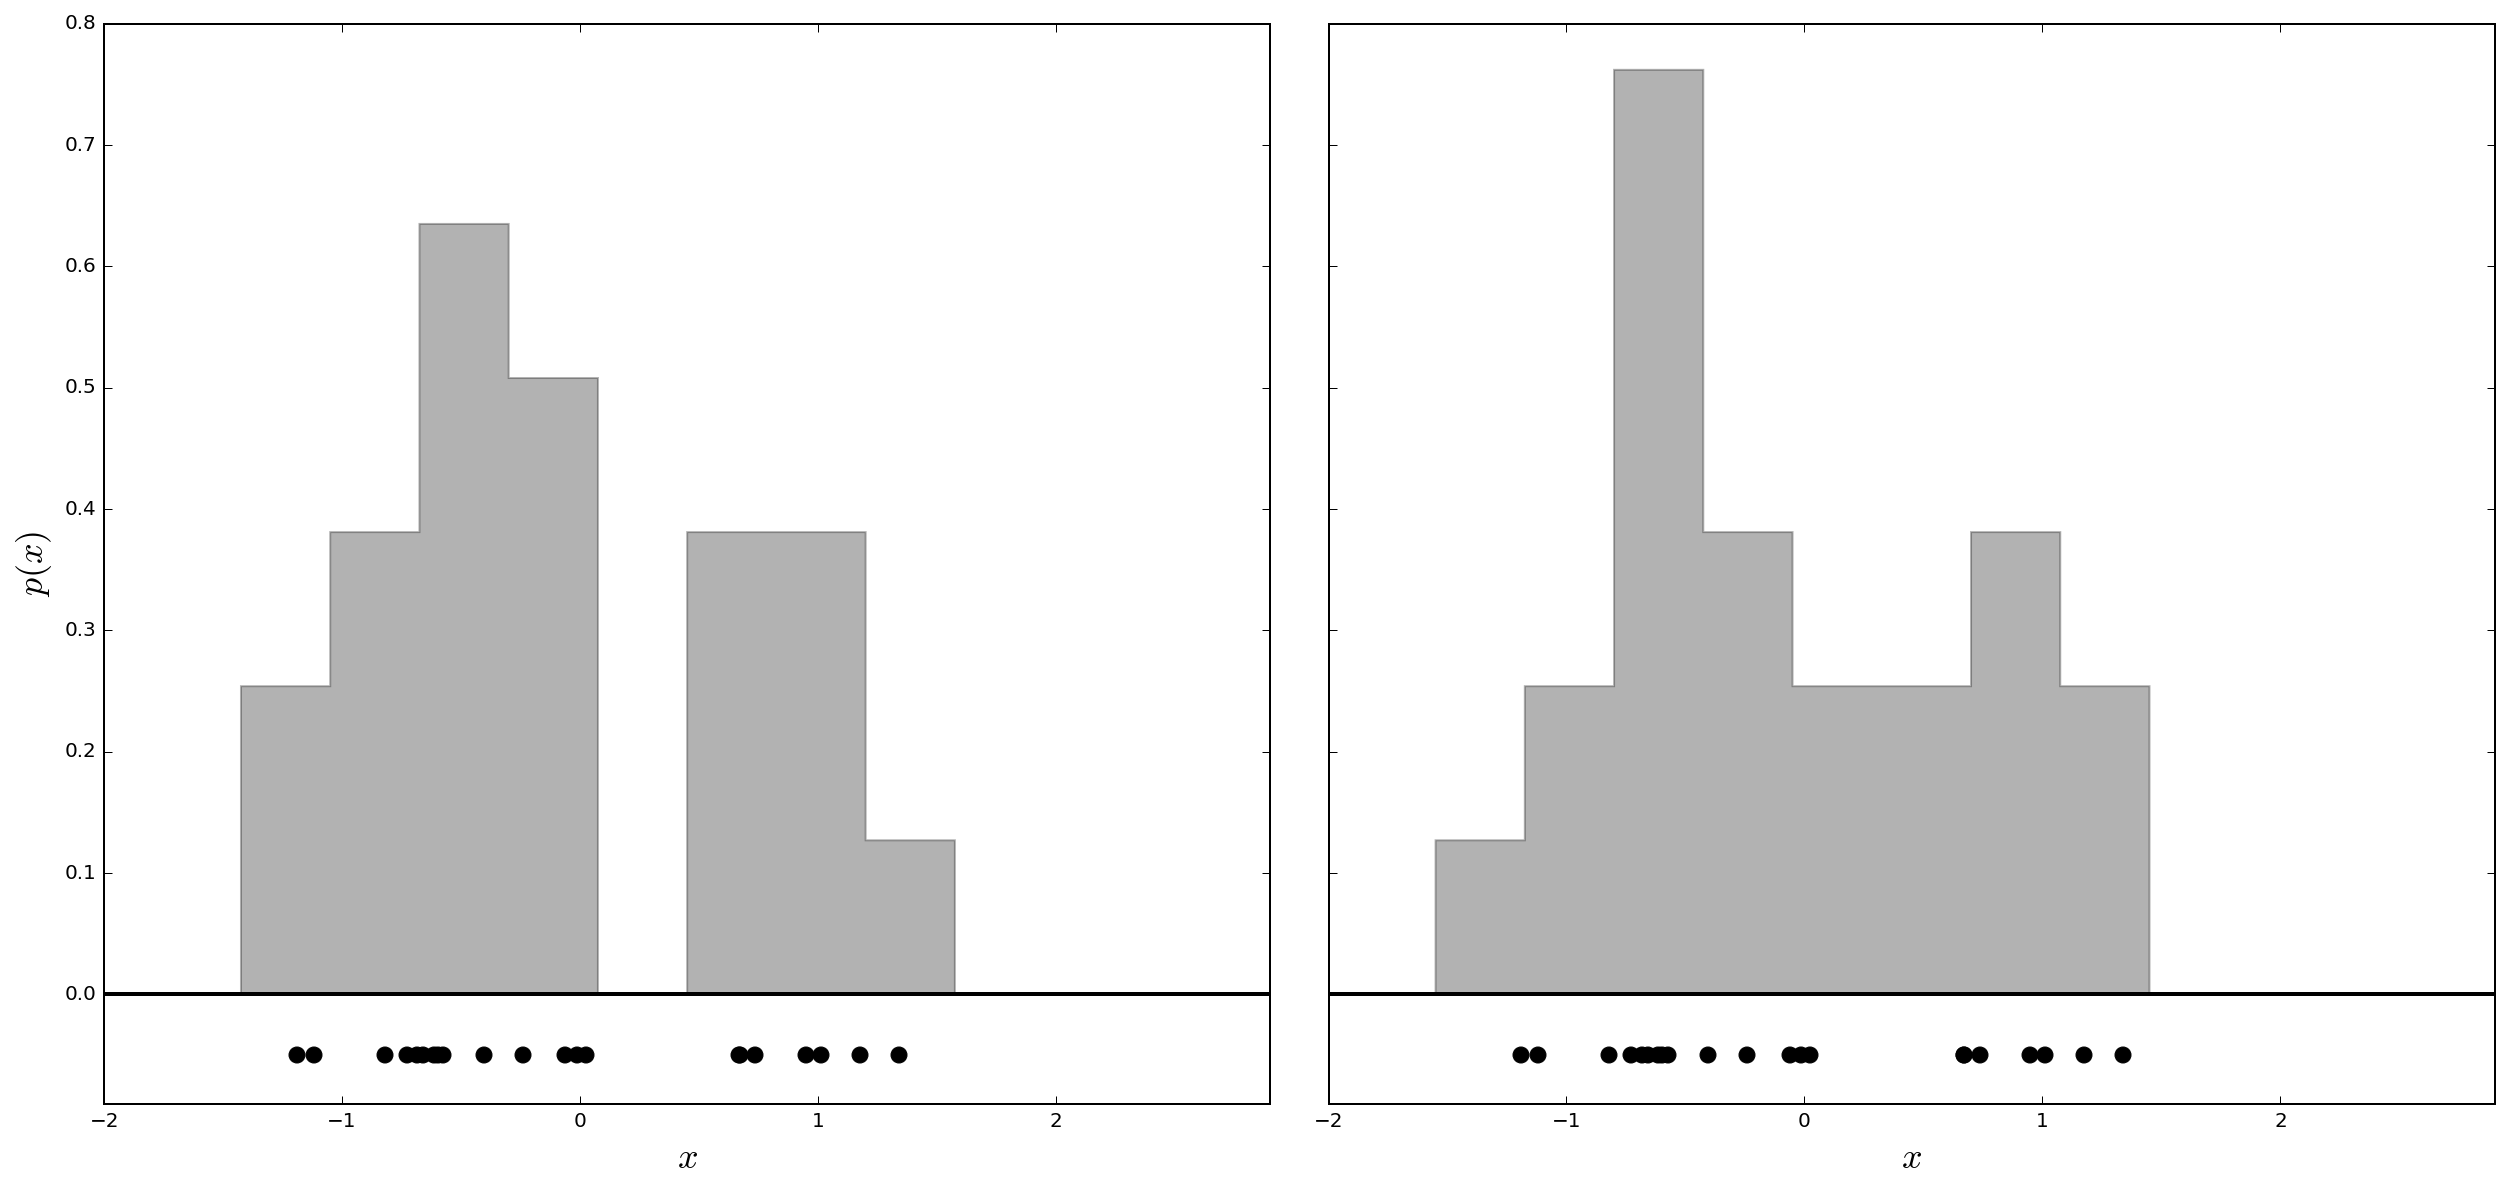

In [26]:
np.random.seed(1)
x = np.concatenate([np.random.normal(-0.5, 0.3, size=14),
                    np.random.normal(1, 0.3, size=7)])


#------------------------------------------------------------
# First figure: silly histogram binning
fig1 = plt.figure(figsize=(20, 10))
fig1.subplots_adjust(left=0.12, right=0.95, wspace=0.05,
                     bottom=0.15, top=0.9, hspace=0.05)

FC = '#6666FF'
XLIM = (-2, 2.9)
YLIM = (-0.09, 0.8)

ax = fig1.add_subplot(121)
bins = np.linspace(-1.8, 2.7, 13)
ax.hist(x, bins=bins, normed=True,
        histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=2)
ax.plot(x, 0 * x - 0.05, 'ok',markersize=8)
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$p(x)$',fontsize=18)

ax = fig1.add_subplot(122)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.hist(x, bins=bins + 0.25, normed=True,
        histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=2)
ax.plot(x, 0 * x - 0.05, 'ok',markersize=8)
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$',fontsize=18)

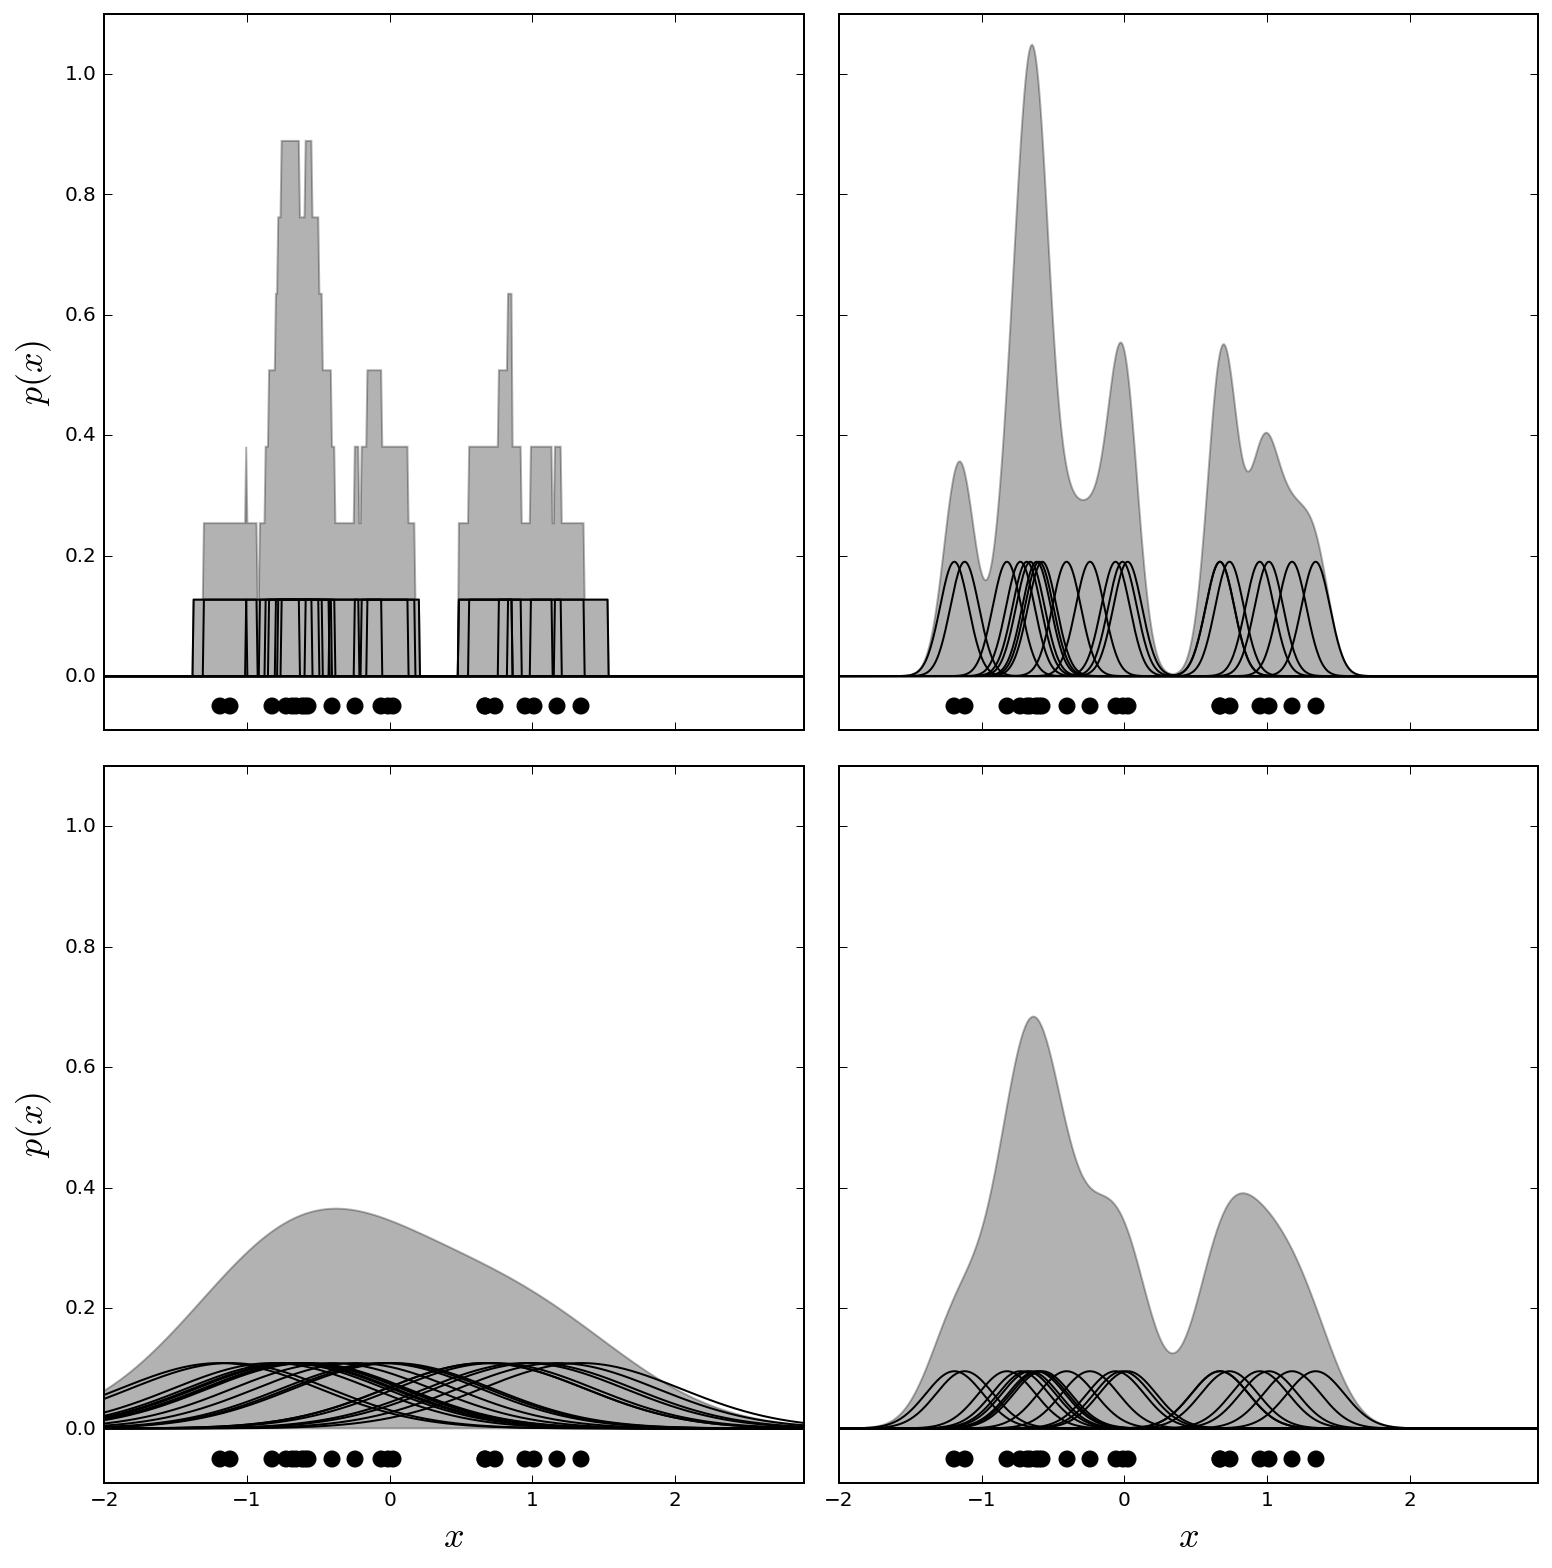

In [24]:
#------------------------------------------------------------
# First figure: transition to KDE
fig2 = plt.figure(figsize=(12, 12))
fig2.subplots_adjust(left=0.12, right=0.95, wspace=0.05,
                     bottom=0.1, top=0.95, hspace=0.05)

ax = fig2.add_subplot(221)
ax.xaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = (abs(x_plot - x[:, None]) <= 0.5 * binwidth).astype(float)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, 'ok',markersize=8)
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$',fontsize=18)

ax = fig2.add_subplot(222)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.1)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, 'ok',markersize=8)
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)

ax = fig2.add_subplot(223)
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.7)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, 4 * y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, 'ok',markersize=8)
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$',fontsize=18)
ax.set_xlabel('$x$',fontsize=18)

ax = fig2.add_subplot(224)
ax.yaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.2)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, 'ok',markersize=8)
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$',fontsize=18)

plt.show()